In [64]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [65]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [176]:
i1 = 0.05
i2 = 0.1

w1 = 0.15
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = .4
w6 = .45
w7 = .5
w8 = .55

b1 = 0.35
b2 = 0.6

total_errors = []


In [211]:
# forward pass

print(f'w1: {w1:.4f}')

net_h1 = i1 * w1 + i2 * w2 + b1
net_h2 = i1 * w3 + i2 * w4 + b1

out_h1 = sigmoid((net_h1))
out_h2 = sigmoid((net_h2))

net_o1 = out_h1 * w5 + out_h2 * w6 + b2
net_o2 = out_h1 * w7 + out_h2 * w8 + b2

out_o1 = sigmoid((net_o1))
out_o2 = sigmoid((net_o2))

target1 = 0.01
target2 = 0.99

e1 = 0.5 * (target1 - out_o1)**2    # MSE
e2 = 0.5 * (target2 - out_o2)**2

e = e1 + e2
total_errors.append(e)
print(f'total error: {e}')


w1: 0.6520
total error: 0.22631599613307968


In [212]:
# backward pass

# Calculate partial_e_wrt_w1
partial_net_h1_wrt_w1 = i1
partial_out_h1_wrt_net_h1 = out_h1 * (1 - out_h1)
partial_net_o1_wrt_out_h1 = w5
partial_out_o1_wrt_net_o1 = out_o1 * (1 - out_o1)
partial_e1_wrt_out_o1 = -(target1 - out_o1)
partial_e1_wrt_out_h1 = partial_net_o1_wrt_out_h1 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
partial_net_o2_wrt_out_h1 = w6
partial_out_o2_wrt_net_o2 = out_o2 * (1 - out_o2)
partial_e2_wrt_out_o2 = -(target2 - out_o2)
partial_e2_wrt_out_h1 = partial_net_o2_wrt_out_h1 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
partial_e_wrt_out_h1 = partial_e1_wrt_out_h1 + partial_e2_wrt_out_h1
partial_e_wrt_w1 = partial_net_h1_wrt_w1 * partial_out_h1_wrt_net_h1 * partial_e_wrt_out_h1

# Calculate partial_e_wrt_w2
partial_net_h2_wrt_w2 = i1
partial_out_h2_wrt_net_h2 = out_h2 * (1 - out_h2)
partial_net_o1_wrt_out_h2 = w7
partial_e1_wrt_out_h2 = partial_net_o1_wrt_out_h2 * partial_out_o1_wrt_net_o1 * partial_e1_wrt_out_o1
partial_net_o2_wrt_out_h2 = w8
partial_e2_wrt_out_h2 = partial_net_o2_wrt_out_h2 * partial_out_o2_wrt_net_o2 * partial_e2_wrt_out_o2
partial_e_wrt_out_h2 = partial_e1_wrt_out_h2 + partial_e2_wrt_out_h2
partial_e_wrt_w2 = partial_net_h2_wrt_w2 * partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2

# Calculate partial_e_wrt_w3
partial_net_h1_wrt_w3 = i2
partial_e_wrt_w3 = partial_net_h1_wrt_w3 * partial_out_h1_wrt_net_h1 * partial_e_wrt_out_h1

# Calculate partial e wrt w4
partial_net_h2_wrt_w4 = i2
partial_e_wrt_w4 = partial_net_h2_wrt_w4 * partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2

# Calculate partial e wrt w5
partial_net_o1_wrt_w5 = out_h1
partial_e_wrt_out_o1 = -(target1 - out_o1)
partial_e_wrt_w5 = partial_net_o1_wrt_w5 * partial_out_o1_wrt_net_o1 * partial_e_wrt_out_o1

# Calculate partial e wrt w6
partial_net_o2_wrt_w6 = out_h1
partial_e_wrt_out_o2 = -(target2 - out_o2)
partial_e_wrt_w6 = partial_net_o2_wrt_w6 * partial_out_o2_wrt_net_o2 * partial_e_wrt_out_o2

# Calculate partial e wrt w7
partial_net_o1_wrt_w7 = out_h2
partial_e_wrt_w7 = partial_net_o1_wrt_w7 * partial_out_o1_wrt_net_o1 * partial_e_wrt_out_o1

# Calculate partial e wrt w8
partial_net_o2_wrt_w8 = out_h2
partial_e_wrt_w8 = partial_net_o2_wrt_w8 * partial_out_o2_wrt_net_o2 * partial_e_wrt_out_o2

# Calculate partial e wrt b1
partial_net_h1_wrt_b1 = 1
partial_net_h2_wrt_b1 = 1
partial_e1_wrt_b1 = partial_net_h1_wrt_b1 * partial_net_h2_wrt_b1 * partial_out_h1_wrt_net_h1 * partial_out_h2_wrt_net_h2 * partial_e1_wrt_out_h1 * partial_e1_wrt_out_h2
partial_e2_wrt_b1 = partial_net_h1_wrt_b1 * partial_net_h2_wrt_b1 * partial_out_h1_wrt_net_h1 * partial_out_h2_wrt_net_h2 * partial_e2_wrt_out_h1 * partial_e2_wrt_out_h2
partial_e_wrt_b1 = partial_e1_wrt_b1 + partial_e2_wrt_b1

# Calculate partial e wrt b2
partial_e_wrt_b2 = partial_out_h2_wrt_net_h2 * partial_e_wrt_out_h2



print(f'partial_e_wrt_w1: {partial_e_wrt_w1}')
print(f'partial_e_wrt_w2: {partial_e_wrt_w2}')
print(f'partial_e_wrt_w3: {partial_e_wrt_w3}')
print(f'partial_e_wrt_w4: {partial_e_wrt_w4}')
print(f'partial_e_wrt_w5: {partial_e_wrt_w5}')
print(f'partial_e_wrt_w6: {partial_e_wrt_w6}')
print(f'partial_e_wrt_w7: {partial_e_wrt_w7}')
print(f'partial_e_wrt_w8: {partial_e_wrt_w8}')


partial_e_wrt_w1: -0.015185685089372018
partial_e_wrt_w2: -0.015044491012544028
partial_e_wrt_w3: -0.030371370178744035
partial_e_wrt_w4: -0.030088982025088057
partial_e_wrt_w5: 0.07483196841564616
partial_e_wrt_w6: -0.07025138776700263
partial_e_wrt_w7: 0.07741821408617625
partial_e_wrt_w8: -0.07267932533576973


In [213]:
# Let's update w5 and recalculate the total error
LR = 10

w1 = w1 - LR * partial_e_wrt_w1
w2 = w2 - LR * partial_e_wrt_w2
w3 = w3 - LR * partial_e_wrt_w3
w4 = w4 - LR * partial_e_wrt_w4
w5 = w5 - LR * partial_e_wrt_w5
w6 = w6 - LR * partial_e_wrt_w6
w7 = w7 - LR * partial_e_wrt_w7
w8 = w8 - LR * partial_e_wrt_w8



# print(f'old w5: {w5}')
# w5 = w5 - LR * partial_e_wrt_w5
# print(f'updated w5: {w5}')

# o1 = h1 * w5 + h2 * w6 + b2
# o1 = torch.sigmoid((o1))
# e1 = 0.5 * (target1 - o1)**2    # MSE
# e = e1 + e2
# print(f'total error: {e}')

# Let's update w6 and recalculate the total error

total errors: [0.2983711087600027, 0.26504789932502626, 0.2424984928780024, 0.23193432150910553, 0.2281928793045917, 0.22702093173463356, 0.22662815003017145, 0.22644425995218703, 0.22631599613307968]


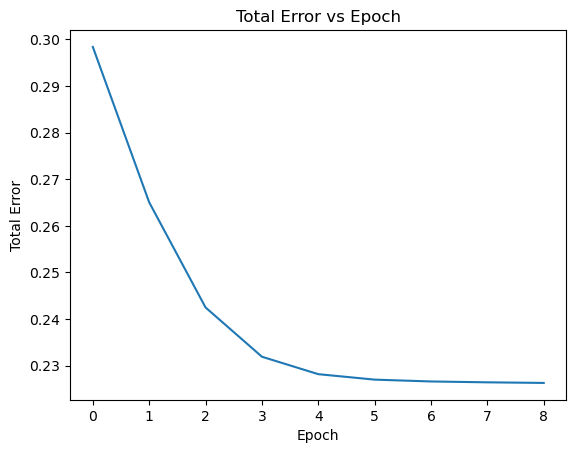

In [214]:
print(f'total errors: {total_errors}')

# Plot the total error
plt.plot(total_errors)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Total Error vs Epoch')
plt.show()


### Questions:

- Why do we include the bias to require gradients when they don't contain gradients because they're derivative is always zero? Hmm or maybe we just forgot about them?

Updating only w1 decreased the error total, but very slow even with a LR of 10